<a href="https://colab.research.google.com/github/gonzo1978/CAP4453/blob/main/1.%20Image_processing_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Image Processing in Python**

By: Gonzalo Vaca-Castano


>This colab notes provides an introduction to basic image processing techniques using the OpenCV computer vision library and some standard libraries in Python.

>This course will have multiple homeworks. Each homeworks must be delivered as a colab notebook. You need to learn to create them in order to deliver your homeworks.

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*

*Notes taken adapted from: https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTibt






<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!


## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).


# Python Basics
## 1. Loading dependencies

> Python has powerful libraries that help you creating your code. Use <b>import</b> to load a dependency. Some popular dependencies that probably will be used in this class are:  **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**


*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

##Step2: a) Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

In [ ]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571","https://github.com/gonzo1978/CAP4453/blob/main/imgs/red.jpg?raw=true"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

##Step2: b) Read Images from your local computer

> You can use files from google.colab library to upload images. The name of the file is used as a key in a dictionary to get the data from image.


Saving red.jpg to red.jpg


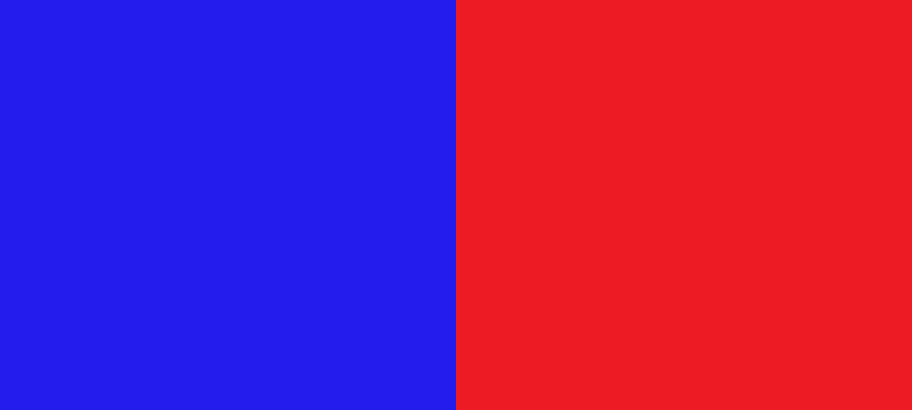

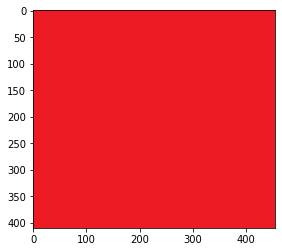

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = io.imread(BytesIO(uploaded['red.jpg']))

im2 = cv.cvtColor(im, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((im, im2))
cv2_imshow(final_frame)
print('\n')

# YOU CAN ALSO USE OTHER LIBRARIES TO VISUALIZE
import matplotlib.pyplot as plt
plt.imshow(im)    #matplotlib uses RGB, no need to invert, it shows as red
plt.show()


##Step3: Image Contours and Histograms

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(im.dtype)
# Check the height of image
print(im.shape[0])
# Check the width of image
print(im.shape[1])
# Check the number of channels of the image
print(im.shape[2])

uint8
410
456
3


### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

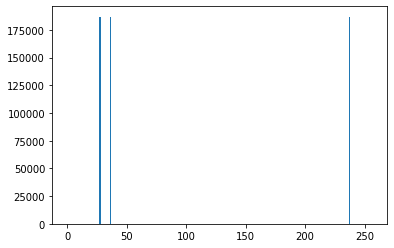

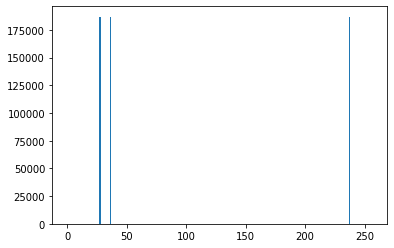

In [ ]:
plt.hist(im.ravel(),bins = 256, range = [0,256])
plt.show()
plt.hist(im2.ravel(),bins = 256, range = [0,256])
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

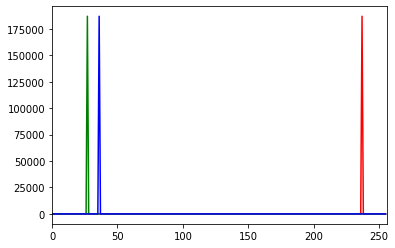

In [ ]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([im],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

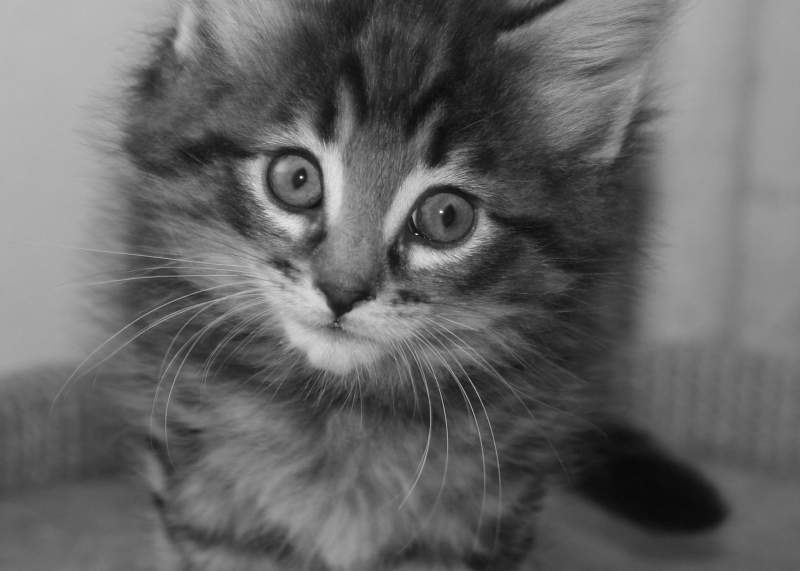

In [ ]:
image = io.imread('https://placekitten.com/800/571')   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

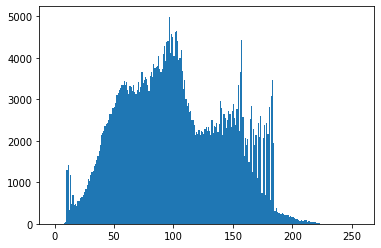

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

##Step4: Convert into different space color
> You can use openCV to convert to HSV, CIELab or any other color space

uint8
float32


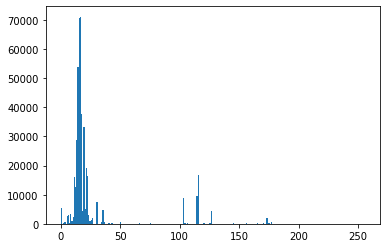

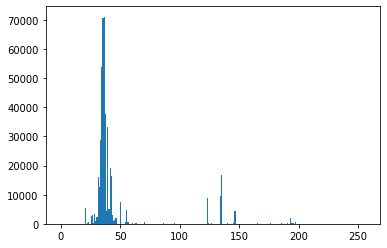

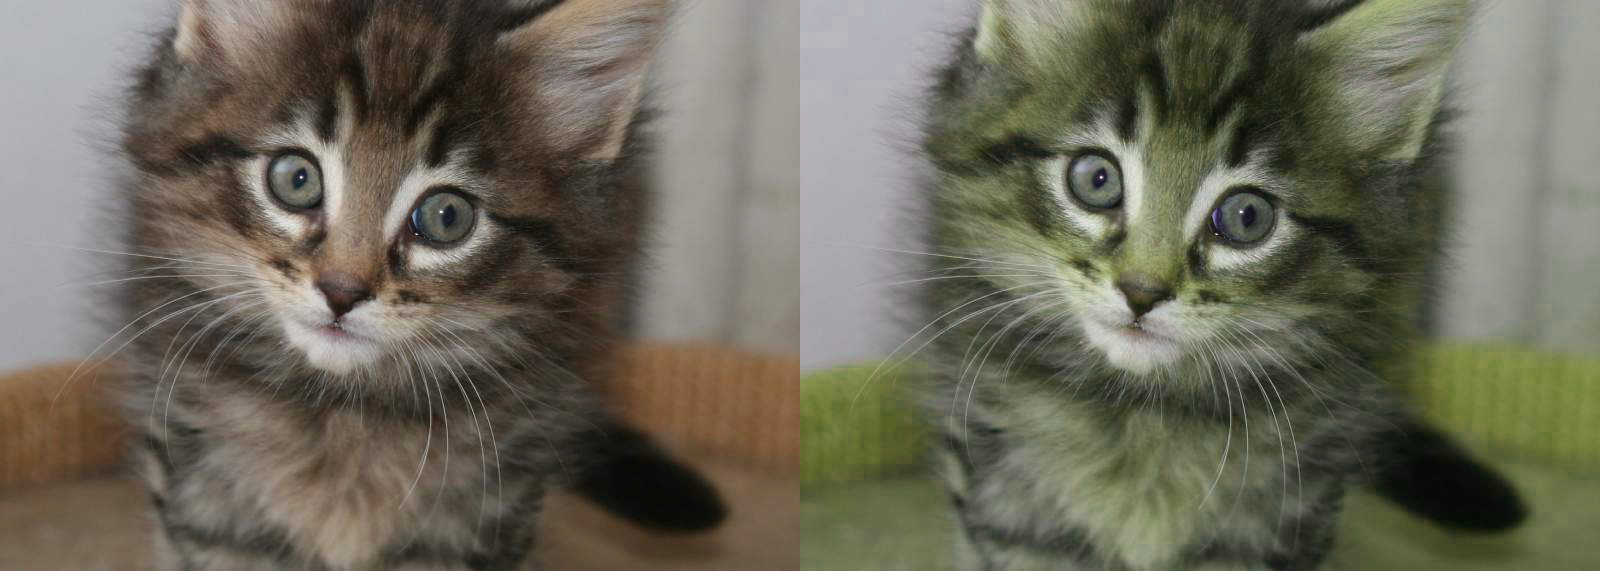

In [ ]:
hsvImg = cv.cvtColor(image, cv.COLOR_BGR2HSV)
print(hsvImg.dtype)
hsvImg = hsvImg.astype(np.float32)
print(hsvImg.dtype)
hsvImgNew=np.copy(hsvImg)
plt.hist(hsvImg[:,:,0].ravel(),bins = 256, range = [0, 256])
plt.show()
hsvImgNew[:,:,0]=hsvImgNew[:,:,0]+20
plt.hist(hsvImgNew[:,:,0].ravel(),bins = 256, range = [0, 256])
plt.show()
hsvImg = cv.cvtColor(hsvImg.astype(np.uint8), cv.COLOR_HSV2BGR)    # ctvColor expects a uint8
hsvImgNew = cv.cvtColor(hsvImgNew.astype(np.uint8), cv.COLOR_HSV2BGR)
final_frame = cv.hconcat((hsvImg, hsvImgNew))
cv2_imshow(final_frame)

#**Homework 1**

1. Upload a personal image in hosting place that can be accesed using an URL. In case you can find access, pick an image from an URL already available. The image must be different to any of the used in the tutorial. Display the image making sure that the image has the channels in the right order [20%]

2. Exchange the red and green channels and display the image with the inverted channels [20%]


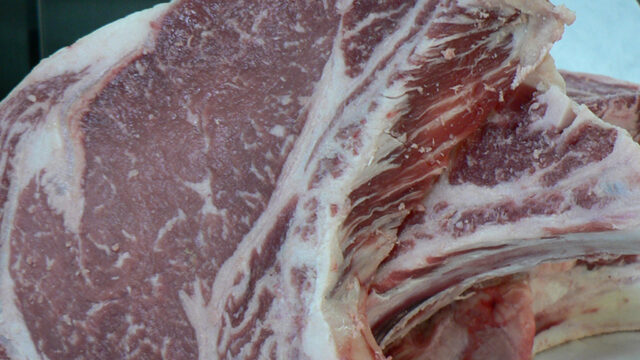

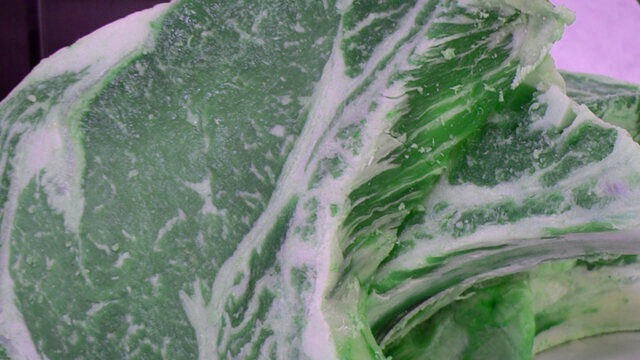

In [5]:
#Homework 1 by Josef Ortiz-Feder UCFID: 5101726

# Getting the image from a placeholder URL page
yourUrl = 'https://baconmockup.com/640/360'
tempImage = io.imread(yourUrl)
# Change the channels to get the original image and display it
yourImage = cv.cvtColor(tempImage, cv.COLOR_BGR2RGB)
cv2_imshow(yourImage)

# Exchange the red and green channels by splitting them into the individual channels and then putting them back together with red and green swapped
blueChannel, greenChannel, redChannel = cv.split(yourImage)
invertedImage = cv.merge((blueChannel, redChannel, greenChannel))
cv2_imshow(invertedImage)




3. Visualize an histogram for each color channel of the upper half of the image [20%]

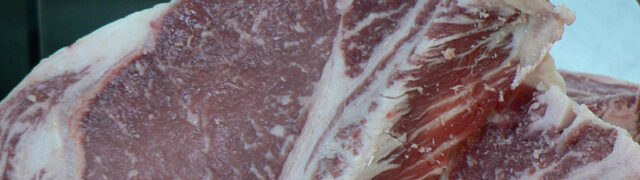

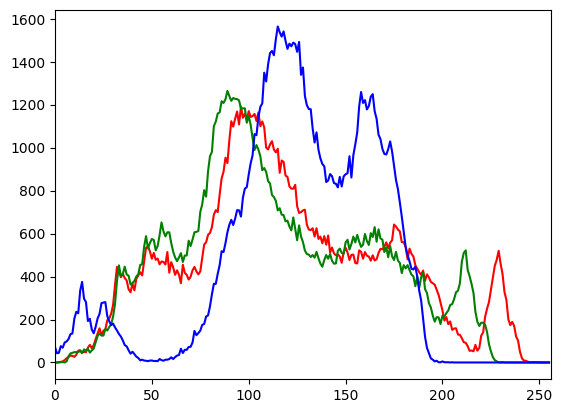

In [6]:
# you can use slicing to select the half part of the image
#newImg = img[0:height/2,:,:]
height = yourImage.shape[0]
halfImg = yourImage[0:int(height/2),:,:]
cv2_imshow(halfImg)

# get the histogram

color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([halfImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

4. Convert the image to CIELab color [5%].

 a. Create a new image with added value of 10 in the L channel, and convert it back to the BGR color space to visualize it. [5%] (make sure to use the right data type, and that your image makes sense)

 b. Create a new image with substracted value of 10 in the L channel, and convert it back to BGR to visualize it. [5%] (make sure to use the right data type, and that your image makes sense)

 c. Create a new image with added value of 10 in the a channel, and convert it back to BGR to visualize it.  [5%]  (make sure to use the right data type, and that your image makes sense)

In [27]:
# Show the original image
print("Original Image")
cv2_imshow(yourImage)

# Convert to CIELab
lab_image = cv.cvtColor(yourImage, cv.COLOR_BGR2LAB)

# Split the image into its channels
L, a, b = cv.split(lab_image)

# Add to L as specified and put the image back together
Lab_A = np.clip(L + 10, 0, 255)
lab_image_modified = cv.merge((Lab_A, a, b))

# Convert back into BGR and output
final_A = cv.cvtColor(lab_image_modified, cv.COLOR_Lab2BGR)
print("Part A:")
cv2_imshow(final_A)

# Same as above but for part B
Lab_B = np.clip(L - 10, 0, 255)

lab_image_modified = cv.merge((Lab_B, a, b))
final_B = cv.cvtColor(lab_image_modified, cv.COLOR_Lab2BGR)
print("Part B:")
cv2_imshow(final_B)

# Same as above but for part C
Lab_C = np.clip(a + 10, 0, 255)
lab_image_modified = cv.merge((L, Lab_C, b))
final_C = cv.cvtColor(lab_image_modified, cv.COLOR_Lab2BGR)
print("Part C:")
cv2_imshow(final_C)



Output hidden; open in https://colab.research.google.com to view.

5. Show histograms for each channel of the images generated in the exercise 4. Compare these histograms with the original histograms. Comment about the differences and write son conclussions about it. [20%]

Original


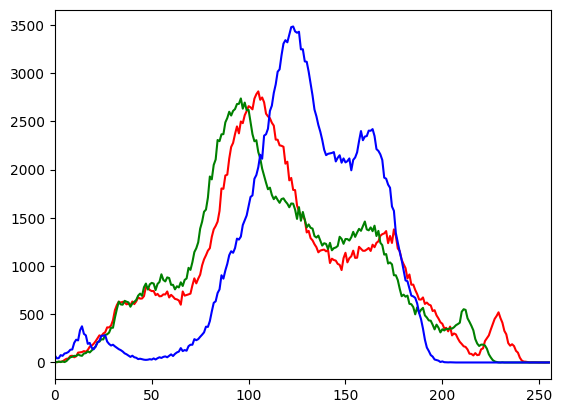

Part A: L+10 Image


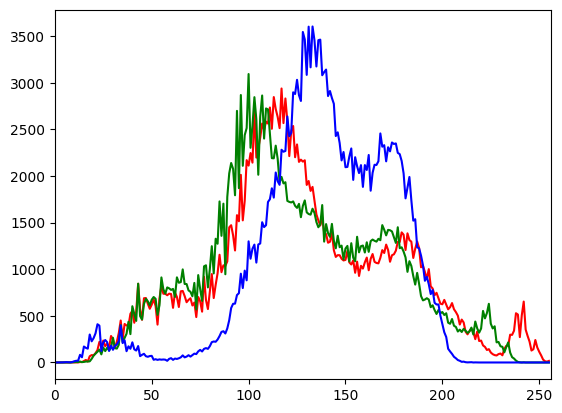

Part B: L-10 Image


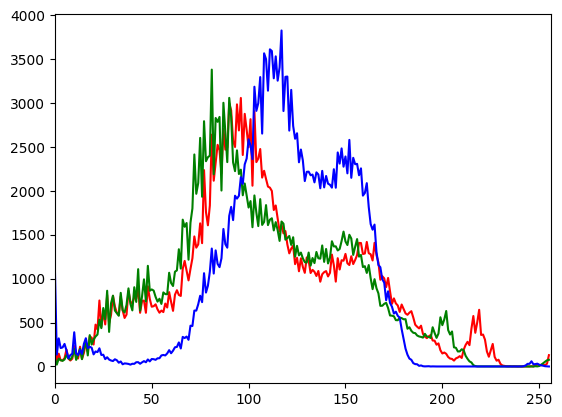

Part C: a+10 Image


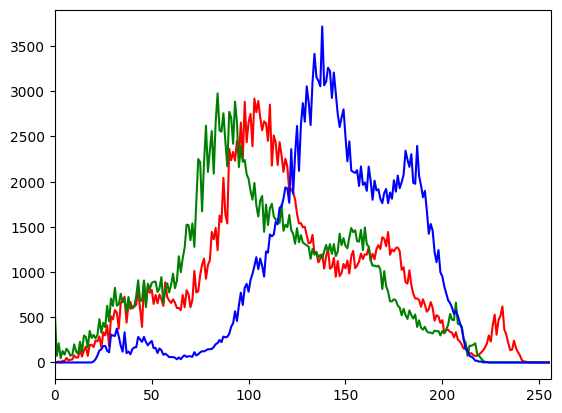

In [29]:
# Output all of the histograms as shown in the tutorial of this assignment
print("Original")
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([yourImage],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print("Part A: L+10 Image")
for i,col in enumerate(color):
    histr = cv.calcHist([final_A],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print("Part B: L-10 Image")
for i,col in enumerate(color):
    histr = cv.calcHist([final_B],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print("Part C: a+10 Image")
for i,col in enumerate(color):
    histr = cv.calcHist([final_C],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Comments:
For parts a and b, the graphs become rougher and less smooth which makes sense because changing the L value changes the brightness of image, therefore requiring more concentrations of color throughout the image. It's hard to tell but the "L+10" histogram is slightly shifted to the right, compared to the "L-10" histogram which makes sense because the former is the brighter image, while the latter is the darker image, meaning that the darker one needs less color while the brighter one needs more color.
For part c, I can see that the image has a greater emphasis on the color red. This matches with what is stated on the slides and is also shown in the histograms as the "a+10" histogram seems to show more red compared to the original.
